In [69]:
import pysam
import os
import textwrap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
# Excelent explanation of the vaccine application flow
# https://www.protocols.io/view/understanding-the-purpose-of-every-nucleotide-in-t-br3am8ie?step=5

In [8]:
pfizer_fname = 'data/pfizer.fa'
covid_sequences = 'data/cov_after_jan_1st_2022/genomic.fna'
if not os.path.exists(pfizer_fname + '.fai'):
    pysam.faidx(pfizer_fname)
pfizer = pysam.FastaFile(pfizer_fname)
#! makeblastdb -in corona_genome.faa -dbtype prot -parse_seqids -input_type fasta
# sed 1d pfizer_s_protein.faa | wc -c
# tr -cd '[:space:]' < pfizer_s_protein.faa | wc -m      Calculate spaces
# https://web.expasy.org/translate/
# blastp -db ALL_S/999.faa -query pfizer_s_protein.faa -out results_999.csv -outfmt 7 -max_target_seqs 99999999# AZ https://www.ncbi.nlm.nih.gov/protein/YP_009724390.1

In [51]:
def write_fasta(dictionary, filename):
    """
    Takes a dictionary and writes it to a fasta file
    Must specify the filename when caling the function
    """
    with open(filename, "w") as outfile:
        for key, value in dictionary.items():
            outfile.write(key + "\n")
            outfile.write("\n".join(textwrap.wrap(value, 60)))
            outfile.write("\n")
            
s_pfizer = pfizer.fetch(pfizer.references[0], 103-1, 3879-1)  # From 11889.doc
write_fasta({'Pfizer s protein': s_pfizer}, 'data/pfizer_s_protein.fa')

,% identity,mismatches
count,9999.000000,9999.000000
mean,99.789387,2.632663
std,0.038618,0.482725
min,99.680000,2.000000
25%,99.760000,2.000000
50%,99.760000,3.000000
75%,99.840000,3.000000
max,99.840000,4.000000


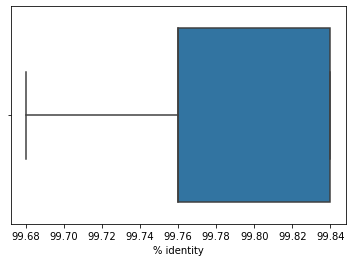

In [82]:
def read_results(fname):
    fields = ['query id', 'subject id', '% identity', 'alignment length', 
              'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 
              's. end', 'evalue', 'bit score']
    df = pd.read_csv(fname, comment='#', sep='\t')
    df.columns = fields
    df = df.sort_values('% identity')
    out_df = df.describe()[['% identity', 'mismatches']]
    display(out_df)
    out_df.to_csv('results' + os.path.sep + fname.split(os.path.sep)[-1].rstrip('.csv') + '_distribution.csv')
    sns.boxplot(x=df['% identity'], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    plt.savefig('results' + os.path.sep + fname.split(os.path.sep)[-1] + '.png', dpi=200)
    
    return df

res_early = read_results('data/results_10000.csv')

,% identity,mismatches
count,53165.000000,53165.000000
mean,97.593773,25.033876
std,1.552217,16.804976
min,82.980000,2.000000
25%,96.670000,11.000000
50%,97.140000,29.000000
75%,98.970000,33.000000
max,99.840000,212.000000


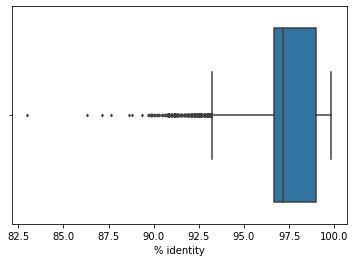

In [83]:
# blastp -db S_2022/protein.faa -query vaccines/pfizer_s_protein.faa  -outfmt 7 -max_target_seqs 99999 -out results_latest_53165.csv
res_late = read_results('data/results_latest_53165.csv')

In [22]:
# with open('data/ALL_S/data_report.jsonl') as json_file:
#     json_list = list(json_file)

In [ ]:
# for ind,json_str in enumerate(json_list):
#     entry = json.loads(json_str)
#     print(entry)
#     print('-------------------------')
#     if 'annotation' in entry:
#         if 'UHW52637' in (entry['annotation']['genes'][0]['cds'][0]['nucleotide']['accessionVersion']):
#             print(entry['accession'])

In [76]:
# data_catalog['annotation']['genes'][0]['cds'][0]['nucleotide']['accessionVersion']